In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import xgboost as xg
import seaborn as sb

In [3]:
data = pd.read_csv("alzheimer.csv")
print(data)
df = pd.DataFrame(data, columns=['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF'])
print(df)

          Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0   Nondemented   M   87    14  2.0    27  0.0  1987  0.696  0.883
1   Nondemented   M   88    14  2.0    30  0.0  2004  0.681  0.876
2      Demented   M   75    12  NaN    23  0.5  1678  0.736  1.046
3      Demented   M   76    12  NaN    28  0.5  1738  0.713  1.010
4      Demented   M   80    12  NaN    22  0.5  1698  0.701  1.034
5   Nondemented   F   88    18  3.0    28  0.0  1215  0.710  1.444
6   Nondemented   F   90    18  3.0    27  0.0  1200  0.718  1.462
7   Nondemented   M   80    12  4.0    28  0.0  1689  0.712  1.039
8   Nondemented   M   83    12  4.0    29  0.5  1701  0.711  1.032
9   Nondemented   M   85    12  4.0    30  0.0  1699  0.705  1.033
10     Demented   M   71    16  NaN    28  0.5  1357  0.748  1.293
11     Demented   M   73    16  NaN    27  1.0  1365  0.727  1.286
12     Demented   M   75    16  NaN    27  1.0  1372  0.710  1.279
13  Nondemented   F   93    14  2.0    30  0.0  1272  0.698  1

In [4]:
def scale(sc):
    scs = sc.copy()
    columns=['Age','EDUC','SES','MMSE','eTIV','ASF']
    for alzfeats in columns:
        max = scs[alzfeats].max()
        min = scs[alzfeats].min()
        scaled_data = (scs[alzfeats] - min)/(max - min)
        scs[alzfeats] = scaled_data
    return scs


In [5]:
scaled_data = scale(data)
scaled_data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,0.764706,0.500000,0.333333,0.785714,0.0,0.978856,0.696,0.011945
1,Nondemented,M,0.794118,0.500000,0.333333,1.000000,0.0,1.000000,0.681,0.000000
2,Demented,M,0.411765,0.333333,NaN,0.500000,0.5,0.594527,0.736,0.290102
3,Demented,M,0.441176,0.333333,NaN,0.857143,0.5,0.669154,0.713,0.228669
4,Demented,M,0.558824,0.333333,NaN,0.428571,0.5,0.619403,0.701,0.269625


In [6]:
trimmed_data = df.drop(labels=[2,3,4,10,11,12],axis=0)
print(trimmed_data)
print(trimmed_data.head())

    Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0    87    14  2.0    27  0.0  1987  0.696  0.883
1    88    14  2.0    30  0.0  2004  0.681  0.876
5    88    18  3.0    28  0.0  1215  0.710  1.444
6    90    18  3.0    27  0.0  1200  0.718  1.462
7    80    12  4.0    28  0.0  1689  0.712  1.039
8    83    12  4.0    29  0.5  1701  0.711  1.032
9    85    12  4.0    30  0.0  1699  0.705  1.033
13   93    14  2.0    30  0.0  1272  0.698  1.380
14   95    14  2.0    29  0.0  1257  0.703  1.396
15   68    12  2.0    27  0.5  1457  0.806  1.205
16   69    12  2.0    24  0.5  1480  0.791  1.186
17   66    12  3.0    30  0.5  1447  0.769  1.213
18   68    12  3.0    29  0.5  1482  0.752  1.184
19   78    16  2.0    29  0.0  1333  0.748  1.316
20   80    16  2.0    29  0.0  1323  0.738  1.326
21   83    16  2.0    29  0.0  1323  0.718  1.327
22   81    12  4.0    30  0.0  1230  0.715  1.427
23   82    12  4.0    30  0.0  1212  0.720  1.448
24   85    12  4.0    29  0.0  1225  0.710  1.433


In [7]:
scaled_data = scale(data)
print(scaled_data)

          Group M/F       Age      EDUC       SES      MMSE  CDR      eTIV  \
0   Nondemented   M  0.764706  0.500000  0.333333  0.785714  0.0  0.978856   
1   Nondemented   M  0.794118  0.500000  0.333333  1.000000  0.0  1.000000   
2      Demented   M  0.411765  0.333333       NaN  0.500000  0.5  0.594527   
3      Demented   M  0.441176  0.333333       NaN  0.857143  0.5  0.669154   
4      Demented   M  0.558824  0.333333       NaN  0.428571  0.5  0.619403   
5   Nondemented   F  0.794118  0.833333  0.666667  0.857143  0.0  0.018657   
6   Nondemented   F  0.852941  0.833333  0.666667  0.785714  0.0  0.000000   
7   Nondemented   M  0.558824  0.333333  1.000000  0.857143  0.0  0.608209   
8   Nondemented   M  0.647059  0.333333  1.000000  0.928571  0.5  0.623134   
9   Nondemented   M  0.705882  0.333333  1.000000  1.000000  0.0  0.620647   
10     Demented   M  0.294118  0.666667       NaN  0.857143  0.5  0.195274   
11     Demented   M  0.352941  0.666667       NaN  0.785714  1.0

In [8]:
trimmed_data = scaled_data.drop(labels=[2,3,4,10,11,12],axis=0)
trimmed_data['Group'].replace(['Nondemented', 'Demented','Converted'],[0, 1, 2], inplace=True) #changing to integers for future purposes as XGBoost classifier was returning errors when Group and Genders were taken as Strings since the rest of the columns are integers
trimmed_data['M/F'].replace(['M','F'],[0,1],inplace=True)
print(trimmed_data)
print(trimmed_data.head())

    Group  M/F       Age      EDUC       SES      MMSE  CDR      eTIV   nWBV  \
0       0    0  0.764706  0.500000  0.333333  0.785714  0.0  0.978856  0.696   
1       0    0  0.794118  0.500000  0.333333  1.000000  0.0  1.000000  0.681   
5       0    1  0.794118  0.833333  0.666667  0.857143  0.0  0.018657  0.710   
6       0    1  0.852941  0.833333  0.666667  0.785714  0.0  0.000000  0.718   
7       0    0  0.558824  0.333333  1.000000  0.857143  0.0  0.608209  0.712   
8       0    0  0.647059  0.333333  1.000000  0.928571  0.5  0.623134  0.711   
9       0    0  0.705882  0.333333  1.000000  1.000000  0.0  0.620647  0.705   
13      0    1  0.941176  0.500000  0.333333  1.000000  0.0  0.089552  0.698   
14      0    1  1.000000  0.500000  0.333333  0.928571  0.0  0.070896  0.703   
15      1    0  0.205882  0.333333  0.333333  0.785714  0.5  0.319652  0.806   
16      1    0  0.235294  0.333333  0.333333  0.571429  0.5  0.348259  0.791   
17      1    1  0.147059  0.333333  0.66

In [9]:
trimmed_data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0.764706,0.500000,0.333333,0.785714,0.0,0.978856,0.696,0.011945
1,0,0,0.794118,0.500000,0.333333,1.000000,0.0,1.000000,0.681,0.000000
5,0,1,0.794118,0.833333,0.666667,0.857143,0.0,0.018657,0.710,0.969283
6,0,1,0.852941,0.833333,0.666667,0.785714,0.0,0.000000,0.718,1.000000
7,0,0,0.558824,0.333333,1.000000,0.857143,0.0,0.608209,0.712,0.278157


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [11]:
y = trimmed_data['Group']
x = trimmed_data.drop('Group',axis=1)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((34, 9), (9, 9), (34,), (9,))

c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


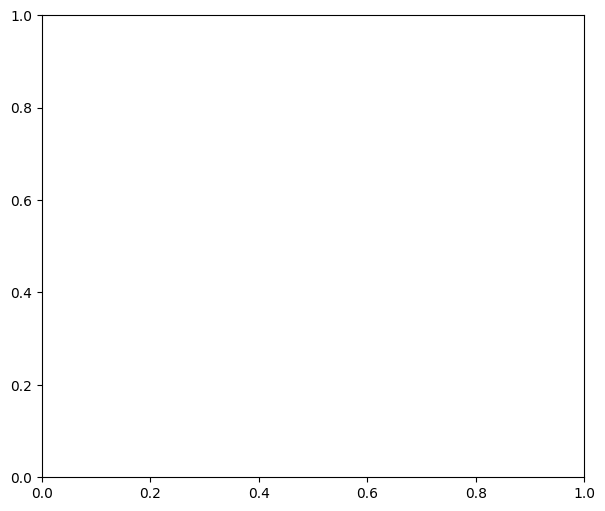

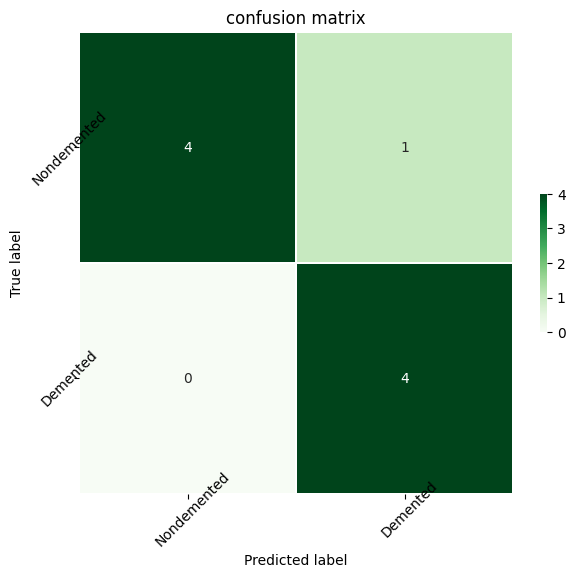

In [12]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(train_x,train_y,verbose=0,early_stopping_rounds=5, eval_set=[(test_x,test_y)])
predict_y =  xgb_model.predict(test_x)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, predict_y)
fig, ax = plt.subplots(figsize=(7, 6))

labeltags= {'Nondemented':0, 'Demented':1}
fig, ax = plt.subplots(figsize=(7, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)
ax.set(
    xticklabels=list(labeltags.keys()),
    yticklabels=list(labeltags.keys()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()


In [13]:
scores = cross_val_score(xgb_model, x, np.array(y), scoring='f1_weighted', cv=5)
print(scores)

c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_la

[1.         0.89065256 0.68518519 0.64107143 0.7125    ]


In [14]:
from scipy.stats import uniform, randint

In [15]:
parameters={"colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), 
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150), 
    "subsample": uniform(0.6, 0.4)}
search = RandomizedSearchCV(xgb_model, param_distributions=parameters, random_state=42, n_iter=200, cv=3, verbose=0, n_jobs=1, return_train_score=True,scoring='f1_weighted')

In [16]:
search.fit(x,y,verbose=0)

c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\sujayayyagari\OneDrive\Desktop\JW Project\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_la

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=0,
                                           gpu_id=-1, grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CBF2557CA0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CBF265FE50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CBF2557EE0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CBF26D5EA0>},
                   random_state=42, return_train_score=True,
                   scoring='f1_weighted')

In [17]:
best_score_for_train_test_model = search.best_estimator_
test_accuracy = best_score_for_train_test_model.score(test_x, test_y)
print('Test set weighted f1 score of the best model: {:.3f}'.format(test_accuracy))
 

Test set weighted f1 score of the best model: 1.000


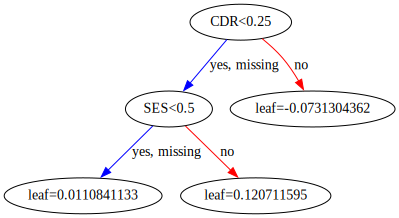

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
xg.to_graphviz(best_score_for_train_test_model, num_trees=xgb_model.best_iteration)


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

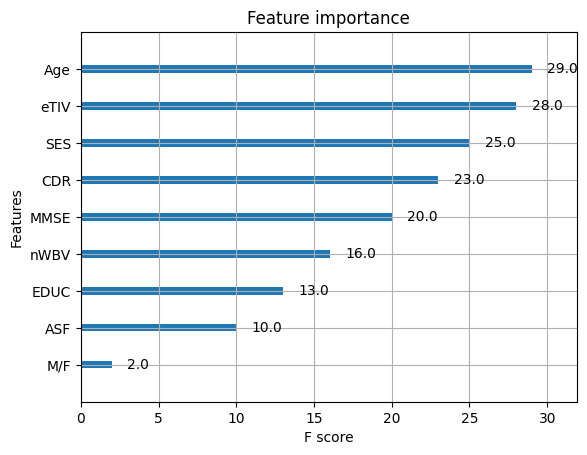

In [19]:
xg.plot_importance(best_score_for_train_test_model)

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report


In [21]:
print('Accuracy:',metrics.accuracy_score(test_y, predict_y))
print('Recall:',metrics.recall_score(test_y, predict_y, zero_division=1))
print("Precision:",metrics.precision_score(test_y, predict_y, zero_division=1))
print("CL Report:",metrics.classification_report(test_y, predict_y, zero_division=1))

Accuracy: 0.8888888888888888
Recall: 1.0
Precision: 0.8
CL Report:               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [22]:
best_score_for_train_test_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7982492056533743, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.05988106590962561, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2971581842219685,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=124,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [23]:
predict_y =  xgb_model.predict(test_x)

In [24]:
import matplotlib.pyplot as plt

In [25]:
predict_y

array([1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [29]:
test_y

43    1
30    0
31    0
42    0
40    1
45    1
7     0
18    1
14    0
Name: Group, dtype: int64

In [30]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(test_y, predict_y)

In [27]:
auc= metrics.roc_auc_score(predict_y,test_y)

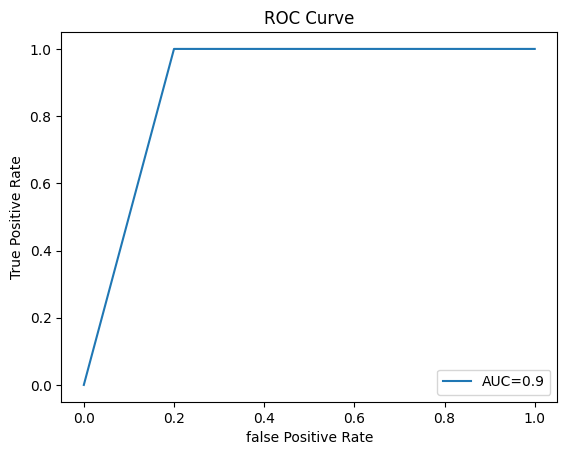

In [28]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)